In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [79]:
#----------------------------------------------------------CLASSIFICATION USING XGBOOST------------------------------------------------------
#--------------------------ABOUT DATASET------------------
#dataset traffic classification

#shape 5952, 9

#columns ->Time,Date, Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation

#missing values->CarCount,BikeCount,BusCount,TruckCount

#remove missing values using,

# Linear Regression for 'CarCount' and 'BikeCount'

# Random Forest Regression for 'BusCount' and 'TruckCount'

#dataset is imbalanced ->using class weight balance the dataset

#for normalize->Min-Max Normalize



#--------------------------from EDA-----------------------
#Number of Truck(TruckCount) has the most contribution to Traffic

#Thursday and Wednesday are the most busy days for traffic

#Peak hours of traffic are between 6:00am-8:00am and 4:00pm-6:00pm

#Normal traffic situation counts the most

#Friday sees the minimum Traffic




#--------------------------feature selection----------------
#using correlation heatmap drop the Total vehecles coloumn


#--------------------------Model XGBoost--------------------
#using sklearn
          #Accuracy: 0.9756302521008403
          #AUC-ROC Score: 0.9974870036284005
          #Precision: 0.9755307486138463
          #Recall: 0.9756302521008403
          #F1 Score: 0.9754317192164059
#without using sklearn
          #Accuracy: 0.9798488664987406
          #Precision: 0.9786790780141844
          #Recall: 0.9616924233832641
          #F1 Score: 0.9694994734994734

In [55]:
df=pd.read_csv('/content/drive/MyDrive/week2_python/traffic.csv')

In [ ]:
df.shape

(5952, 9)

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [56]:
columns_to_introduce_missing_values = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
percentage_to_replace = 0.03  # 3% of values will be replaced

for column in columns_to_introduce_missing_values:
    mask = np.random.rand(len(df)) < percentage_to_replace
    df.loc[mask, column] = np.nan

In [5]:
df.isnull().sum()

Time                   0
Date                   0
Day of the week        0
CarCount             175
BikeCount            180
BusCount             165
TruckCount           187
Total                  0
Traffic Situation      0
dtype: int64

<Axes: >

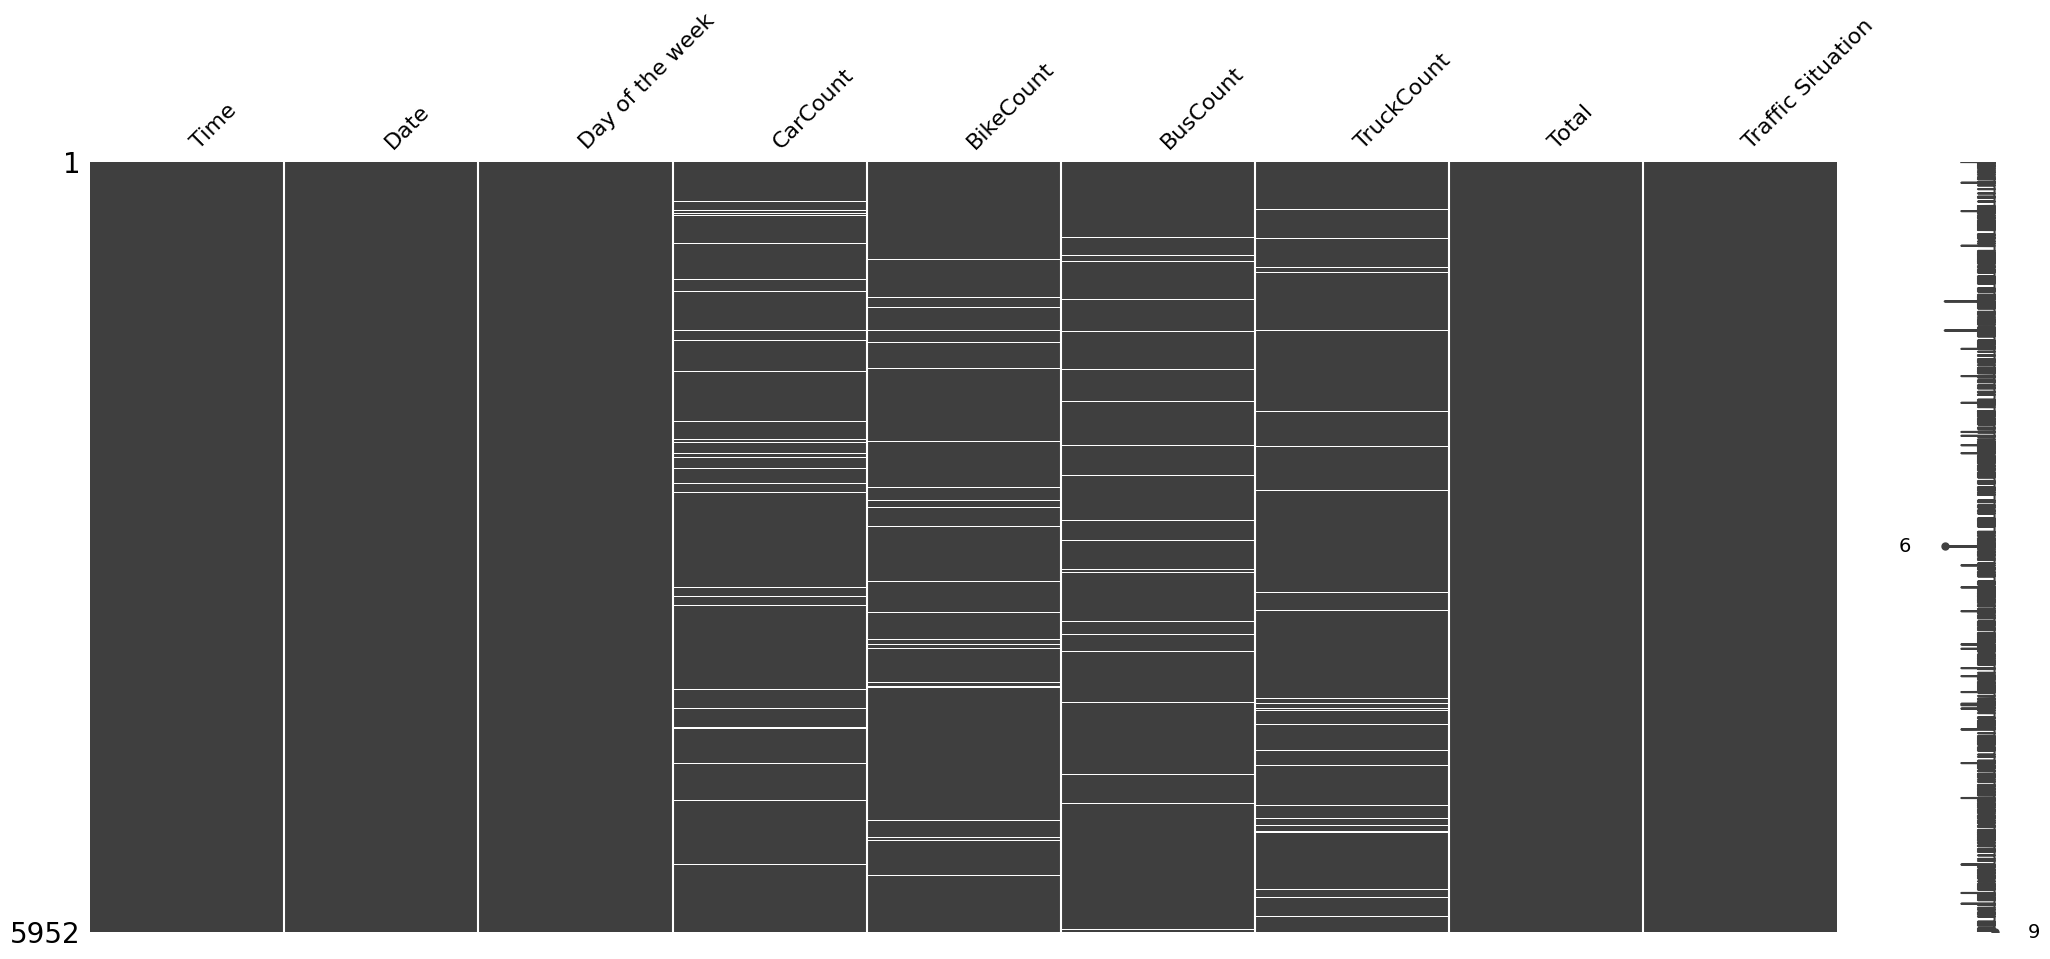

In [6]:
msno.matrix(df)

In [ ]:
print(df['Day of the week'].unique())

['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']


In [ ]:
print(df['Date'].unique())

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  1  2
  3  4  5  6  7  8  9]


In [ ]:
print(df['Traffic Situation'].unique())

['normal' 'low' 'heavy' 'high']


In [57]:

train_set = df.dropna(subset=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])
test_set = df[df['CarCount'].isnull() | df['BikeCount'].isnull() | df['BusCount'].isnull() | df['TruckCount'].isnull()]


In [58]:
features = df[['Total']]

In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression for 'CarCount' and 'BikeCount'
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_set[['Total']], train_set[['CarCount', 'BikeCount']])
predicted_car_bike = linear_reg_model.predict(test_set[['Total']])
df.loc[test_set.index, ['CarCount', 'BikeCount']] = predicted_car_bike

# Random Forest Regression for 'BusCount' and 'TruckCount'
random_forest_model = RandomForestRegressor()
random_forest_model.fit(train_set[['Total']], train_set[['BusCount', 'TruckCount']])
predicted_bus_truck = random_forest_model.predict(test_set[['Total']])
df.loc[test_set.index, ['BusCount', 'TruckCount']] = predicted_bus_truck

print(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].isnull().sum())


CarCount      0
BikeCount     0
BusCount      0
TruckCount    0
dtype: int64


In [10]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame
description = df.describe()

# Display the descriptive statistics
print(description)

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  5952.000000  5952.000000  5952.000000  5952.000000  5952.000000   
mean     16.000000    65.419652    12.176952    12.922217    18.647507   
std       8.945023    44.555092    11.332554    12.272485    10.652889   
min       1.000000     0.179119    -1.430129     0.000000     0.000000   
25%       8.000000    19.000000     3.000000     2.000000    10.000000   
50%      16.000000    62.000000    10.000000    10.608927    18.000000   
75%      24.000000   103.000000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  5952.000000  
mean    109.161458  
std      55.996312  
min      21.000000  
25%      54.000000  
50%     104.000000  
75%     153.000000  
max     279.000000  


In [ ]:
# Distinct Classes in Target variable
df['Traffic Situation'].value_counts()

normal    3610
heavy     1137
low        834
high       371
Name: Traffic Situation, dtype: int64

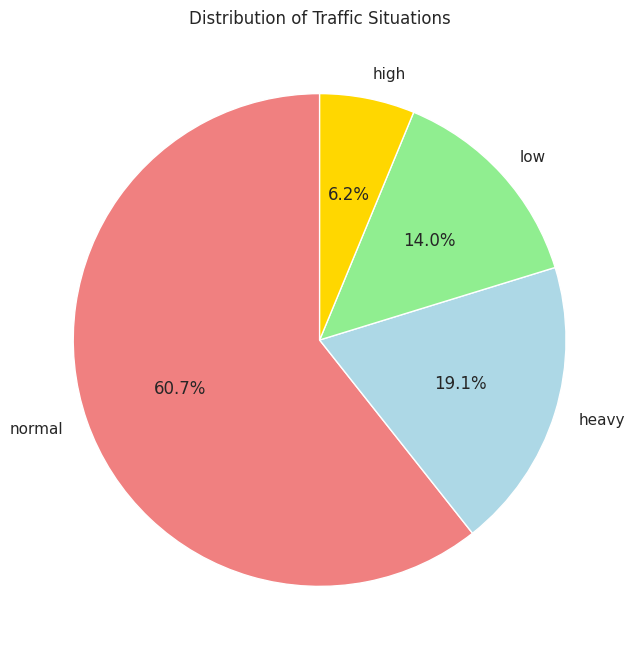

In [60]:
# Count the occurrences of each class
class_counts = df['Traffic Situation'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'], startangle=90)

# Add a title
plt.title('Distribution of Traffic Situations')

# Show the plot
plt.show()

In [ ]:
#Dealing with 'Day of the week' feature
df['Day of the week'].value_counts()

Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: Day of the week, dtype: int64

In [ ]:
df["Date"].value_counts()

10    192
26    192
8     192
7     192
6     192
5     192
4     192
3     192
2     192
1     192
31    192
30    192
29    192
28    192
27    192
25    192
11    192
24    192
23    192
22    192
21    192
20    192
19    192
18    192
17    192
16    192
15    192
14    192
13    192
12    192
9     192
Name: Date, dtype: int64

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'features_to_normalize' is a list of numerical features to be normalized
features_to_normalize = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the specified features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the normalized DataFrame
print(df.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday  0.073273   0.052637      0.04   
1  12:15:00 AM    10         Tuesday  0.078323   0.038705      0.02   
2  12:30:00 AM    10         Tuesday  0.058122   0.052637      0.04   
3  12:45:00 AM    10         Tuesday  0.058122   0.052637      0.04   
4   1:00:00 AM    10         Tuesday  0.063172   0.052637      0.02   

   TruckCount     Total Traffic Situation  
0    0.400000  0.077519            normal  
1    0.600000  0.120155            normal  
2    0.533333  0.096899            normal  
3    0.600000  0.112403            normal  
4    0.566667  0.104651            normal  


In [ ]:
# Assuming 'df' is your DataFrame
description = df.describe()

# Display the descriptive statistics
print(description)

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  5952.000000  5952.000000  5952.000000  5952.000000  5952.000000   
mean     16.000000     0.370900     0.195961     0.257908     0.310944   
std       8.945023     0.244435     0.156890     0.243550     0.176857   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000     0.116638     0.068538     0.040000     0.166667   
50%      16.000000     0.352159     0.164122     0.217184     0.300000   
75%      24.000000     0.576725     0.290976     0.400000     0.450000   
max      31.000000     1.000000     1.000000     1.000000     1.000000   

             Total  
count  5952.000000  
mean      0.341711  
std       0.217040  
min       0.000000  
25%       0.127907  
50%       0.321705  
75%       0.511628  
max       1.000000  


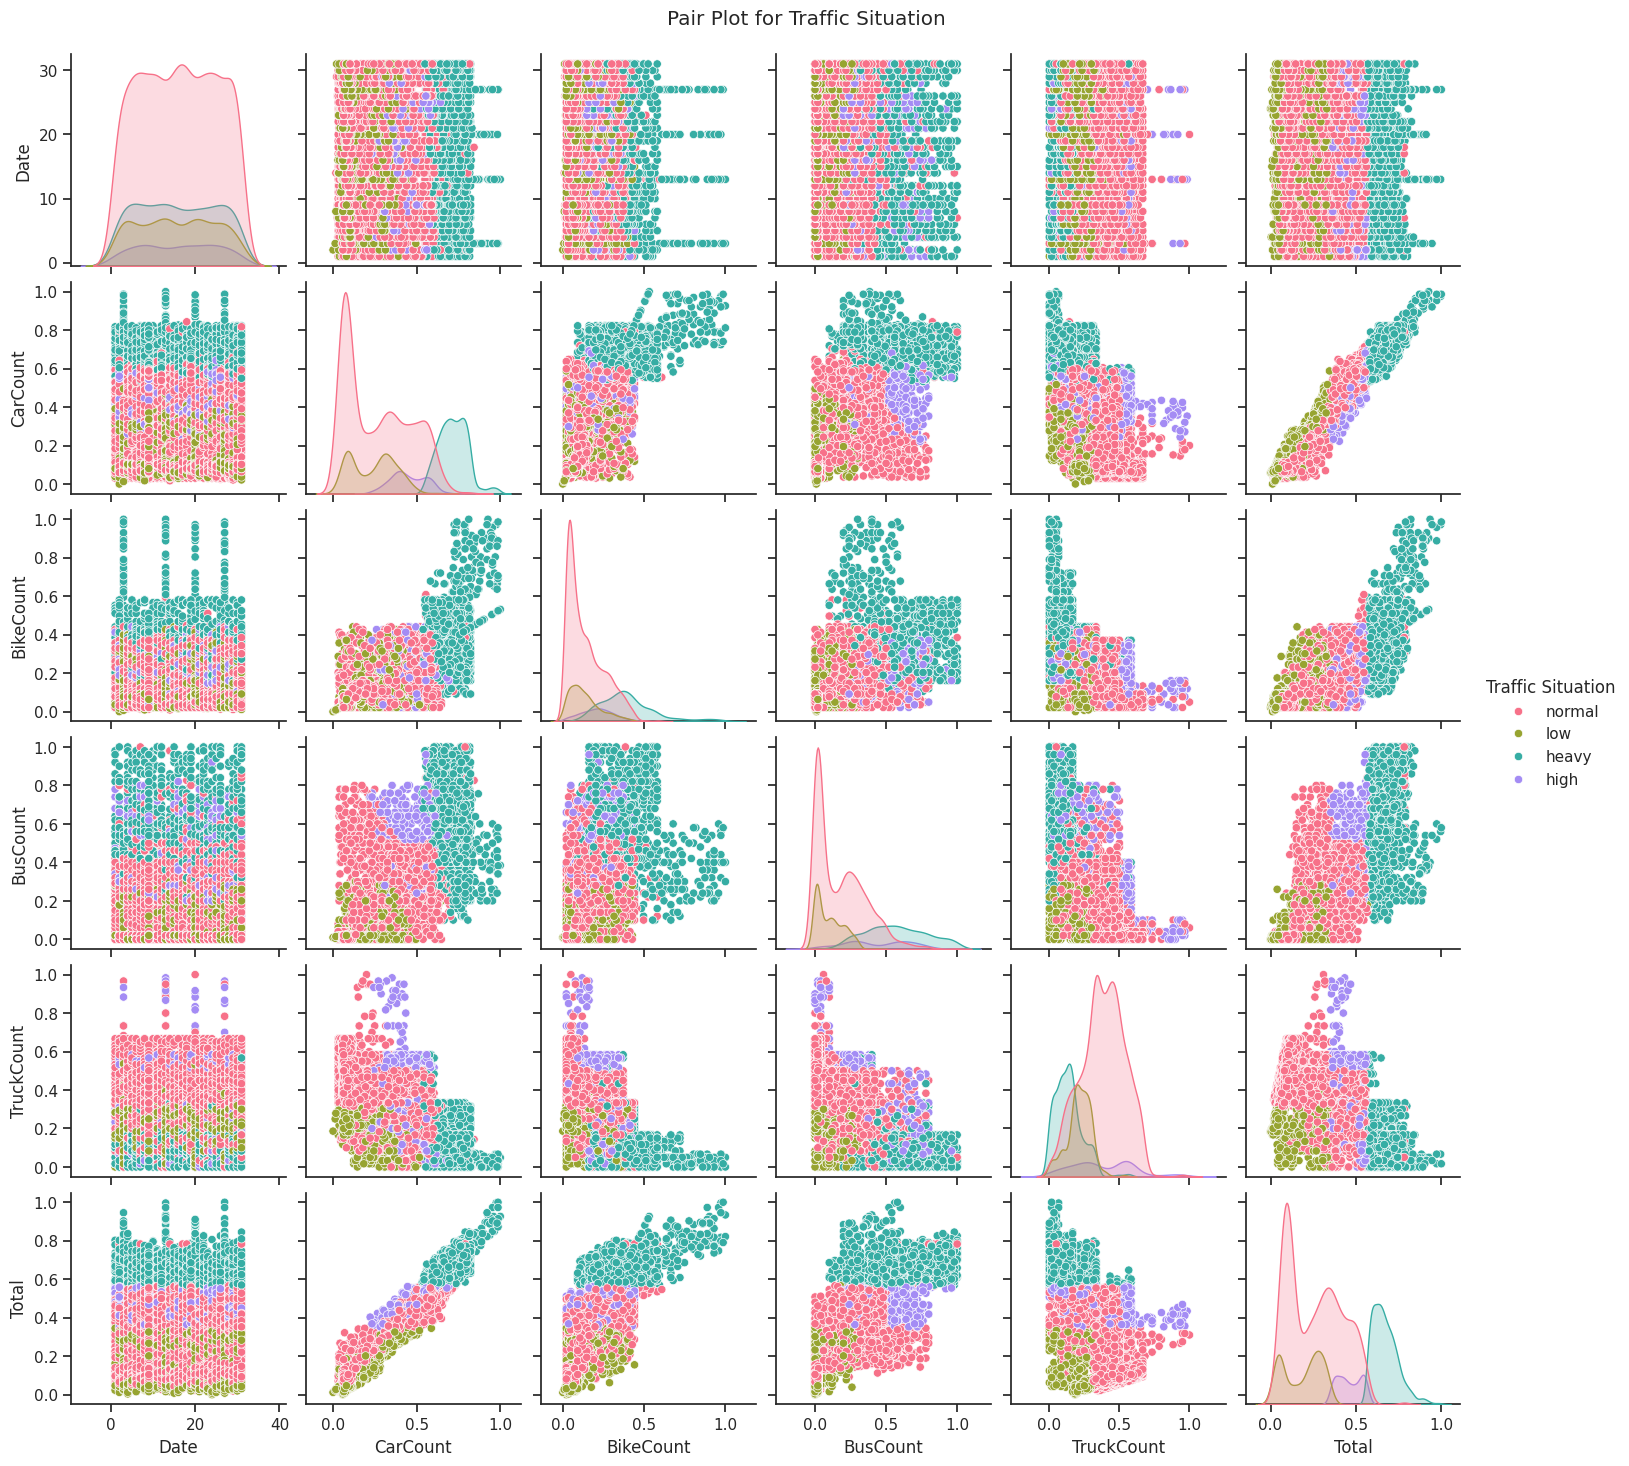

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.set(style="ticks")

# Create a pair plot
pair_plot = sns.pairplot(df, hue="Traffic Situation", palette="husl")

# Adjust plot layout
pair_plot.fig.subplots_adjust(top=0.95)
pair_plot.fig.suptitle("Pair Plot for Traffic Situation")

# Show the plot
plt.show()


In [ ]:
#from pairplot   If carcount is increase Total values increase,Date is uniformly distributed but class is imbalanced

In [62]:
df['TotalVehicles'] = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum(axis=1)


In [63]:
most_contributing_vehicle = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].idxmax(axis=1)
df['MostContributingVehicle'] = most_contributing_vehicle


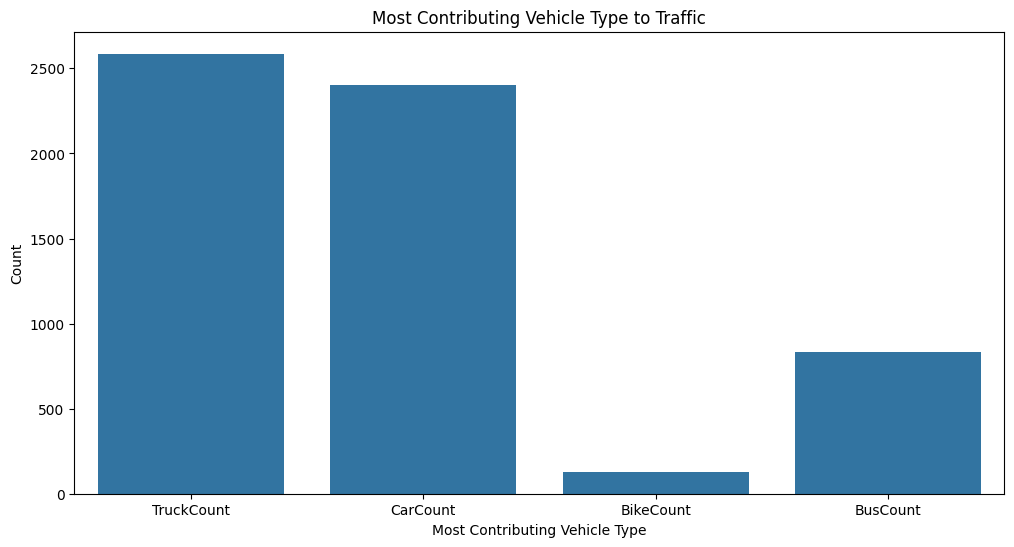

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="MostContributingVehicle")
plt.xlabel('Most Contributing Vehicle Type')
plt.ylabel('Count')
plt.title('Most Contributing Vehicle Type to Traffic')
plt.show()


In [15]:
daily_traffic = df.groupby('Day of the week')['TotalVehicles'].sum()
busiest_days = daily_traffic.idxmax()
print(f"The busiest days for traffic are: {busiest_days}")

The busiest days for traffic are: Wednesday


<ipython-input-32-6e3a624aa1f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="viridis")


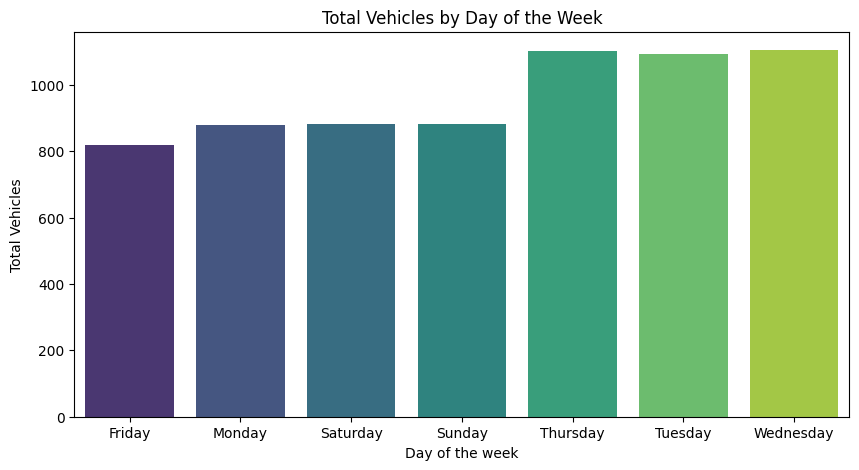

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="viridis")
plt.xlabel('Day of the week')
plt.ylabel('Total Vehicles')
plt.title('Total Vehicles by Day of the Week')
plt.show()


<ipython-input-64-a892ca1583b8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette="viridis")


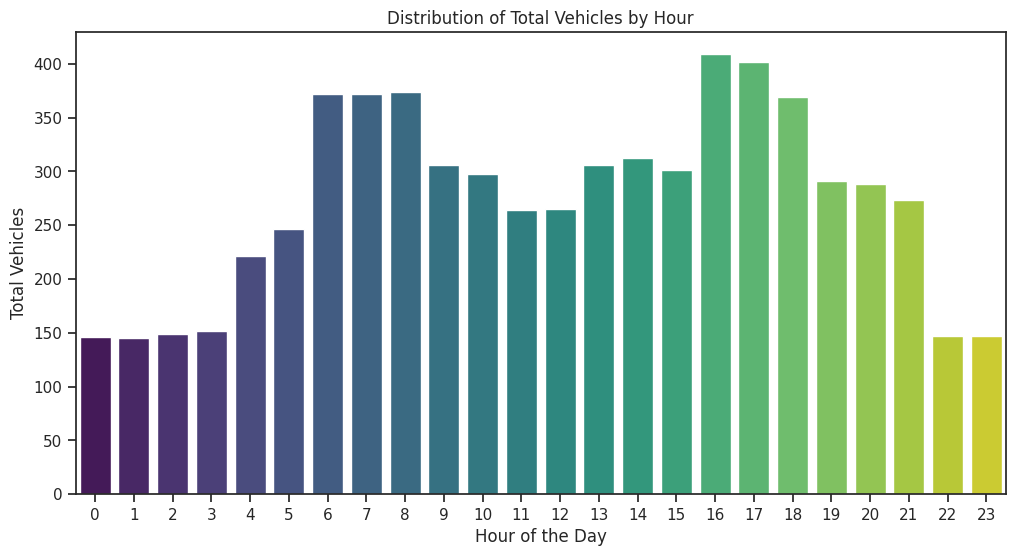

The peak hours of traffic are between 16:00 and 17:00


In [64]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
df['Hour'] = df['Time'].dt.hour

# Group by hour and calculate the total vehicles for each hour
hourly_traffic = df.groupby('Hour')['TotalVehicles'].sum()

# Plot the distribution of total vehicles by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette="viridis")
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicles')
plt.title('Distribution of Total Vehicles by Hour')
plt.show()

# Identify the peak hours with the highest total vehicles
peak_hours = hourly_traffic.nlargest(2).index
print(f"The peak hours of traffic are between {peak_hours[0]}:00 and {peak_hours[1]}:00")


In [ ]:
#Number of Truck(TruckCount) has the most contribution to Traffic

#Thursday and Wednesday are the most busy days for traffic

#Peak hours of traffic are between 6:00am-8:00am and 4:00pm-6:00pm

#Normal traffic situation counts the most

#Friday sees the minimum Traffic

In [65]:
# Get unique days from the 'Day of the week' column
unique_days = df['Day of the week'].unique()

# Create a mapping for each unique day
day_mapping = {day: idx for idx, day in enumerate(unique_days)}

# Map the 'Day of the week' column to numerical values
df['Day_of_week_num'] = df['Day of the week'].map(day_mapping)


In [66]:
# Get unique labels from the 'Traffic Situation' column
unique_traffic_situations = df['Traffic Situation'].unique()

# Create a mapping for each unique label
traffic_situation_mapping = {situation: idx for idx, situation in enumerate(unique_traffic_situations)}

# Map the 'Traffic Situation' column to numerical values
df['Traffic Situation'] = df['Traffic Situation'].map(traffic_situation_mapping)


In [19]:
corr_matrix=df.corr()

<ipython-input-19-a4bfebfd3231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


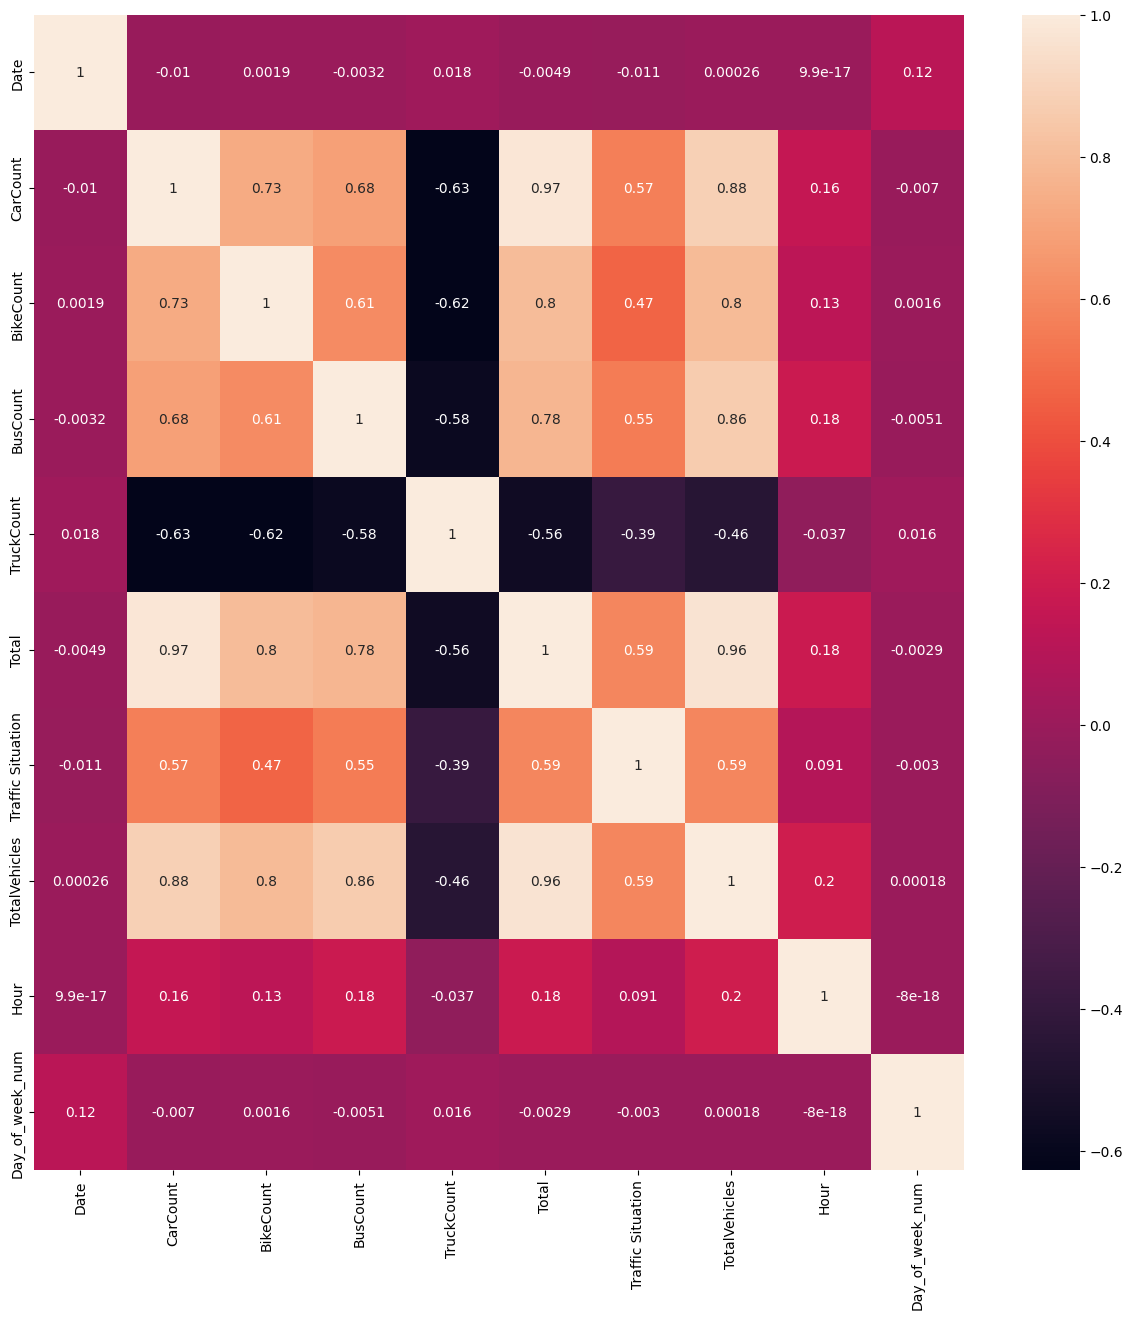

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [67]:
print(df.columns)

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'TotalVehicles',
       'MostContributingVehicle', 'Hour', 'Day_of_week_num'],
      dtype='object')


In [ ]:
print(df.dtypes)

In [68]:
df = df.drop(columns=['Time'])


In [69]:
df=df.drop(columns=['MostContributingVehicle'])

In [70]:
df=df.drop(columns=['Day of the week'])

In [71]:
df=df.drop(columns=['TotalVehicles'])

In [ ]:
print(df.dtypes)

In [72]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Traffic Situation'])  # Assuming 'Traffic Situation' is the target column
y = df['Traffic Situation']

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random indices for the test set
test_indices = np.random.choice(X.index, size=int(0.2 * len(X)), replace=False)

# Create the training and testing sets
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4762, 8)
X_test shape: (1190, 8)
y_train shape: (4762,)
y_test shape: (1190,)


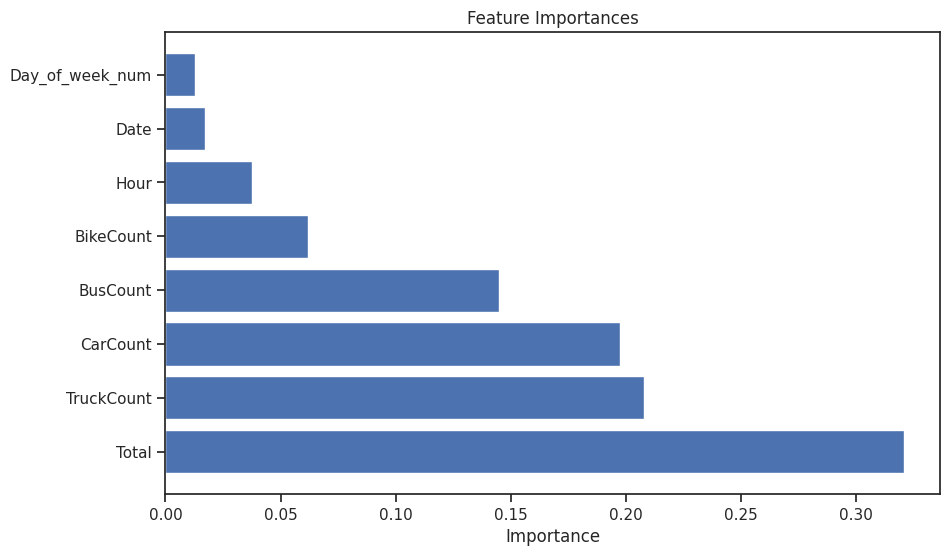

In [73]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'Traffic Situation' with the actual column name you're predicting

# Separate features (X) and target variable (y)
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


# Calculate the number of classes
num_classes = len(np.unique(y_train))

# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='multi:softprob',
    num_class=num_classes
)
xgb_classifier.fit(X_train, y_train)

# Make predictions
predictions_xgb = xgb_classifier.predict(X_test)

# Calculate class probabilities for AUC-ROC Curve
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)

# Evaluate metrics
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
conf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
roc_auc_xgb = roc_auc_score(y_test, class_probabilities_xgb, multi_class='ovr')  # 'ovr' or 'ovo'
precision_xgb = precision_score(y_test, predictions_xgb, average='weighted')
recall_xgb = recall_score(y_test, predictions_xgb, average='weighted')
f1_xgb = f1_score(y_test, predictions_xgb, average='weighted')

# Print the metrics
print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("AUC-ROC Score:", roc_auc_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)



# [[TN_0, FP_0, FN_0, TP_0]
#  [TN_1, FP_1, FN_1, TP_1]
#  [TN_2, FP_2, FN_2, TP_2]
#  [TN_3, FP_3, FN_3, TP_3]]


Accuracy: 0.9756302521008403
Confusion Matrix:
 [[738   8   0   1]
 [ 14 132   0   0]
 [  0   0 216   0]
 [  6   0   0  75]]
AUC-ROC Score: 0.9974870036284005
Precision: 0.9755307486138463
Recall: 0.9756302521008403
F1 Score: 0.9754317192164059


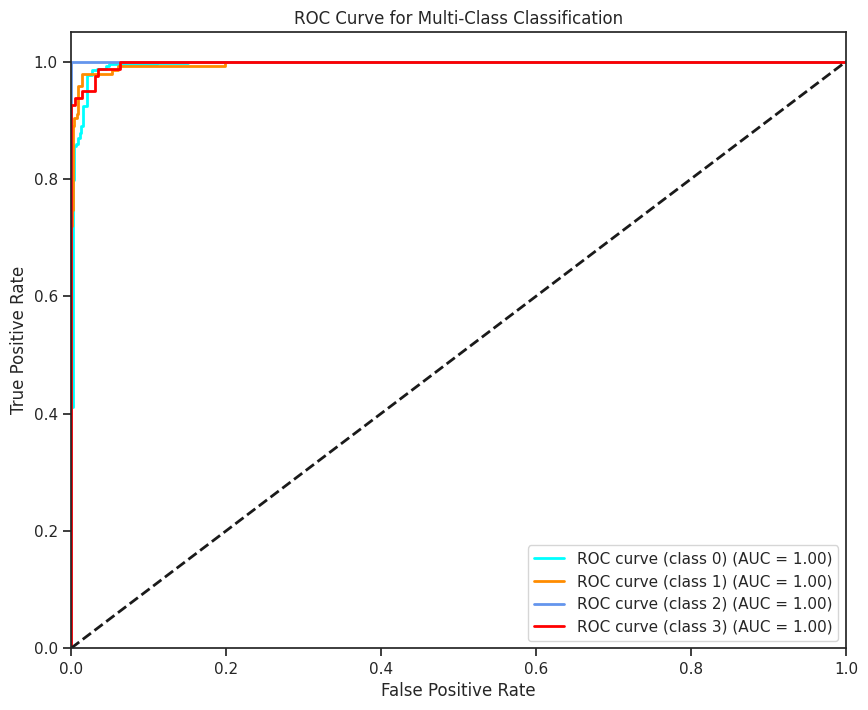

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Calculate the number of classes
num_classes = len(np.unique(y_train))

# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='multi:softprob',
    num_class=num_classes
)
xgb_classifier.fit(X_train, y_train)

# Make predictions and calculate class probabilities for ROC Curve
y_score = xgb_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])  # Add more colors as needed
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import xgboost as xgb

class XGBoostClassifier:
    def __init__(self, learning_rate=0.1, num_iterations=100, max_depth=3, num_classes=4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.max_depth = max_depth
        self.num_classes = num_classes
        self.model = None

    def fit(self, X_train, y_train, sample_weights=None):
        # Convert X_train to a DMatrix
        dtrain = xgb.DMatrix(X_train, label=y_train)

        # Set parameters for multi-class classification
        params = {
            'objective': 'multi:softprob',
            'eta': self.learning_rate,
            'max_depth': self.max_depth,
            'num_class': self.num_classes,
            'eval_metric': 'mlogloss'
        }

        # Create a weight array if sample_weights is provided
        if sample_weights is not None:
            weights = np.repeat(sample_weights, np.bincount(y_train))
            dtrain.set_weight(weights)

        # Train the XGBoost model
        self.model = xgb.train(params, dtrain, num_boost_round=self.num_iterations)

    def predict(self, X_test):
        # Convert X_test to a DMatrix
        dtest = xgb.DMatrix(X_test)

        # Make probability predictions for each class
        y_pred_probs = self.model.predict(dtest)

        # Convert probabilities to class predictions
        predictions = np.argmax(y_pred_probs, axis=1)

        return predictions

    def evaluate_metrics(self, true_labels, predicted_labels):
        # Confusion Matrix
        confusion_matrix = np.zeros((self.num_classes, self.num_classes), dtype=int)
        for true_label, predicted_label in zip(true_labels, predicted_labels):
            confusion_matrix[true_label, predicted_label] += 1

        # Precision, Recall, F1 Score, Accuracy for each class
        precision = np.zeros(self.num_classes)
        recall = np.zeros(self.num_classes)
        f1_score = np.zeros(self.num_classes)

        for i in range(self.num_classes):
            true_positive = confusion_matrix[i, i]
            false_positive = np.sum(confusion_matrix[:, i]) - true_positive
            false_negative = np.sum(confusion_matrix[i, :]) - true_positive

            # Precision
            precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0

            # Recall
            recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

            # F1 Score
            f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

        # Accuracy
        accuracy = np.mean(true_labels == predicted_labels)

        # Macro-averaged metrics
        macro_precision = np.mean(precision)
        macro_recall = np.mean(recall)
        macro_f1_score = np.mean(f1_score)

        return accuracy, macro_precision, macro_recall, macro_f1_score


# Assuming X_train, y_train, X_test, and y_test are available

# Calculate class weights
class_weights = len(y_train) / (num_classes * np.bincount(y_train))

# Example usage:
xgb_classifier = XGBoostClassifier(learning_rate=0.1, num_iterations=100, max_depth=3, num_classes=4)
xgb_classifier.fit(X_train, y_train, sample_weights=class_weights)
predictions_xgb = xgb_classifier.predict(X_test)

# Evaluate metrics
accuracy_xgb, macro_precision_xgb, macro_recall_xgb, macro_f1_xgb = xgb_classifier.evaluate_metrics(y_test, predictions_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", macro_precision_xgb)
print("Recall:", macro_recall_xgb)
print("F1 Score:", macro_f1_xgb)


Accuracy: 0.9798488664987406
Precision: 0.9786790780141844
Recall: 0.9616924233832641
F1 Score: 0.9694994734994734
